<a href="https://colab.research.google.com/github/ShehanPer/PNEUMONIA-DETECTION-CNN/blob/main/PNEUMONIA_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow
!pip install opendatasets


In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import opendatasets as od



In [4]:
od.download("https://www.kaggle.com/datasets/khoongweihao/covid19-xray-dataset-train-test-sets")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shehansudeepaperera
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/khoongweihao/covid19-xray-dataset-train-test-sets


100%|██████████| 84.3M/84.3M [00:02<00:00, 32.1MB/s]


In [5]:
BATCH_SIZE = 32
IMG_SIZE = (128, 128)

train_dir = "/content/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train"
test_dir = "/content/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test"

train_data = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                         batch_size = BATCH_SIZE,
                                                         image_size = IMG_SIZE,
                                                         subset ='training',
                                                         validation_split = 0.1,
                                                         seed=42)
validation_data = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                         batch_size = BATCH_SIZE,
                                                         image_size = IMG_SIZE,
                                                         subset ='validation',
                                                         validation_split = 0.1,
                                                         seed=42)
test_data = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                         batch_size = BATCH_SIZE,
                                                         image_size = IMG_SIZE)

Found 148 files belonging to 2 classes.
Using 134 files for training.
Found 148 files belonging to 2 classes.
Using 14 files for validation.
Found 40 files belonging to 2 classes.


In [6]:
class_names = train_data.class_names
print(class_names)

['NORMAL', 'PNEUMONIA']


In [7]:
train_data.element_spec[0].shape

TensorShape([None, 128, 128, 3])

In [8]:
#set all the pixel values to 0-1
train_data = train_data.map(lambda x, y: (x/255.0, y))
validation_data = validation_data.map(lambda x, y: (x/255.0, y))
test_data = test_data.map(lambda x, y: (x/255.0, y))

#data augmentations
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomContrast(0.2),

  tf.keras.layers.RandomTranslation(0.2, 0.2)
])


In [9]:
#Model architecture
model = tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32,kernel_size=3,activation='relu', input_shape=(128, 128, 3))) # Add input shape
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

# Build the model by specifying the input shape
model.build((None, 128, 128, 3)) # Replace None with batch size if known

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)      

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [11]:
history = model.fit(train_data,
                    epochs=20,
                    validation_data=validation_data)

Epoch 1/20
5/5 [==============================] - 13s 306ms/step - loss: 0.6736 - accuracy: 0.5672 - val_loss: 0.7167 - val_accuracy: 0.2143
Epoch 2/20
5/5 [==============================] - 2s 108ms/step - loss: 0.6138 - accuracy: 0.7164 - val_loss: 0.7176 - val_accuracy: 0.2143
Epoch 3/20
5/5 [==============================] - 3s 143ms/step - loss: 0.5715 - accuracy: 0.7239 - val_loss: 0.7235 - val_accuracy: 0.2143
Epoch 4/20
5/5 [==============================] - 3s 112ms/step - loss: 0.5410 - accuracy: 0.7612 - val_loss: 0.7182 - val_accuracy: 0.2143
Epoch 5/20
5/5 [==============================] - 2s 84ms/step - loss: 0.5057 - accuracy: 0.8134 - val_loss: 0.7129 - val_accuracy: 0.2143
Epoch 6/20
5/5 [==============================] - 2s 83ms/step - loss: 0.4753 - accuracy: 0.7985 - val_loss: 0.7093 - val_accuracy: 0.2143
Epoch 7/20
5/5 [==============================] - 2s 109ms/step - loss: 0.4246 - accuracy: 0.8582 - val_loss: 0.7087 - val_accuracy: 0.2143
Epoch 8/20
5/5 [=====

2/2 [==============================] - 1s 211ms/step - loss: 0.6127 - accuracy: 0.8750


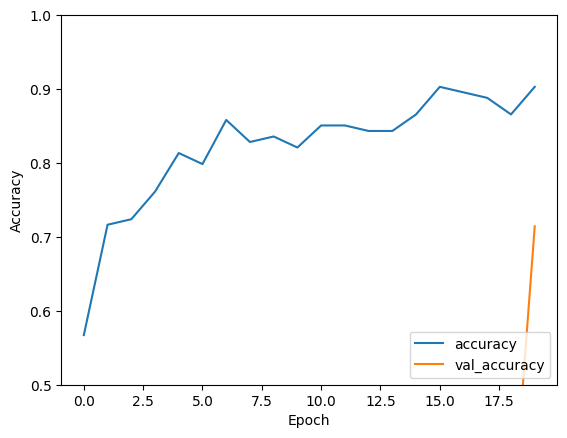

In [12]:
#plot accuracy and loss in two separate graphs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_data)




In [13]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [14]:
for batch in test_data.as_numpy_iterator():
  x,y = batch
  yhat = model.predict(x)
  precision.update_state(y,yhat)
  recall.update_state(y,yhat)
  accuracy.update_state(y,yhat)

print(precision.result().numpy())
print(recall.result().numpy())
print(accuracy.result().numpy())

1/1 [==============================] - 0s 98ms/step
1.0
0.75
0.875


1/1 [==============================] - 0s 20ms/step


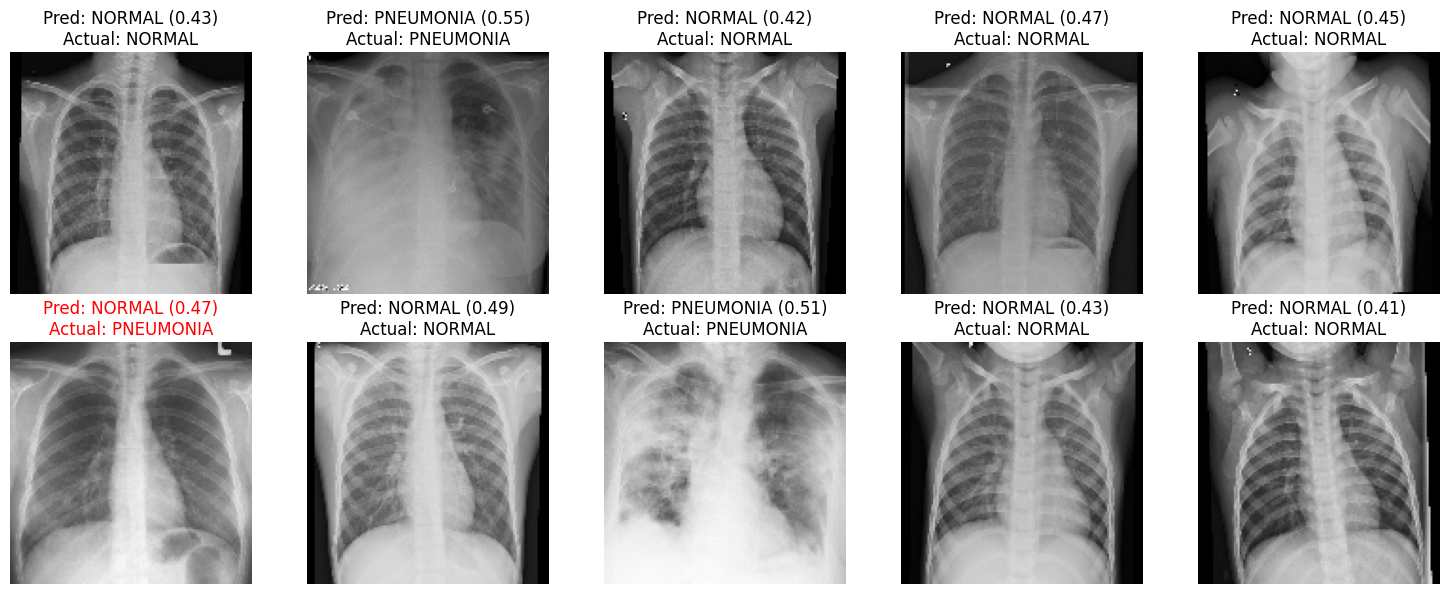

In [23]:
# prompt: now i need to get some images from test data and check the prediction results using my above traind cnn andand show with related images horisontal 2 raws and 5 colums show yhat values also use class names ,if prediction does not match with actual one show it using red color

import matplotlib.pyplot as plt

# Get a batch of images and labels from the test data
images, labels = next(test_data.as_numpy_iterator())

# Make predictions on the batch of images
yhat = model.predict(images)

# Convert predictions to class labels
predicted_labels = (yhat > 0.5).astype(int)

# Create a figure and axes
fig, axs = plt.subplots(2, 5, figsize=(15, 6))

# Iterate over the images and display them with predictions
for i in range(10):
  row = i // 5
  col = i % 5
  axs[row, col].imshow(images[i])
  axs[row, col].axis('off')

  # Get the predicted class label
  predicted_class = class_names[predicted_labels[i][0]]

  # Get the actual class label
  actual_class = class_names[labels[i]]

  # Display the prediction and actual label
  label_text = f"Pred: {predicted_class} ({yhat[i][0]:.2f})\nActual: {actual_class}"

  # Set the text color to red if the prediction is incorrect
  if predicted_class != actual_class:
    axs[row, col].set_title(label_text, color='red')
  else:
    axs[row, col].set_title(label_text)

plt.tight_layout()
plt.show()
